In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
X = pd.read_csv('../../Dataset/Hardwork/Training Data/Linear_X_Train.csv')
Y = pd.read_csv('../../Dataset/Hardwork/Training Data/Linear_Y_Train.csv')

Xt = pd.read_csv('../../Dataset/Hardwork/Test Cases/Linear_X_Test.csv')

In [3]:
print(X.info())
print(Y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       3750 non-null   float64
dtypes: float64(1)
memory usage: 29.4 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3750 entries, 0 to 3749
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       3750 non-null   float64
dtypes: float64(1)
memory usage: 29.4 KB
None


In [4]:
X.columns = ['Coding Time']
Y.columns = ['Exam Score']

In [5]:
print(X.head())
print(Y.head())

   Coding Time
0    -0.289307
1    -0.588810
2     1.027507
3    -0.259013
4     0.782043
   Exam Score
0   -0.091101
1  -53.467721
2   75.457009
3  -12.025286
4   57.414187


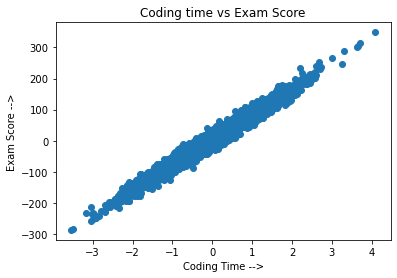

In [6]:
# visualize the data to identify which algo to use for prediction
plt.title("Coding time vs Exam Score")
plt.scatter(X, Y)
plt.xlabel("Coding Time -->")
plt.ylabel("Exam Score -->")
plt.style.use("dark_background")
plt.show()

From the above plot, its viable to make prediction using linear regression

Some interesting facts about this data:
    The coding time and exam score have negative values

In [7]:
# before feeding data for prediction, we need to preprocess the data
X = X.values
Y = Y.values

In [8]:
def loss(Yp, Y):
    return np.sqrt(np.mean((Yp - Y)**2))

In [9]:
def gradient_descent(X, Y, Yp):
    """
    return; slope: shape is same as X
    """
    return np.matmul(X.T, (Yp - Y)) / Y.shape[0]

In [10]:
def linear_regression(X, Y, epochs = 50, lr = 0.001, split=0.2):
    no_sample = X.shape[0]
    X = np.hstack((np.ones(X.shape),
                   X))
    # the X shape is updated by 1 column for W0
    W = np.ones((X.shape[1], 1))
    Xtrain, Xval = X[:int(split*no_sample)], X[int(split*no_sample):]
    Ytrain, Yval = Y[:int(split*no_sample)], Y[int(split*no_sample):]

    train_loss = []
    val_loss = []
    
    for i in range(epochs):
        Yptrain = np.dot(Xtrain, W)
        Ypval = np.dot(Xval, W)
        
        train_loss.append(loss(Yptrain, Ytrain))
        val_loss.append(loss(Ypval, Yval))
        
        W -= lr * gradient_descent(Xtrain, Ytrain, Yptrain)
        
    return W, train_loss, val_loss


In [11]:
W, train_loss, val_loss = linear_regression(X, Y, 200, 0.01)

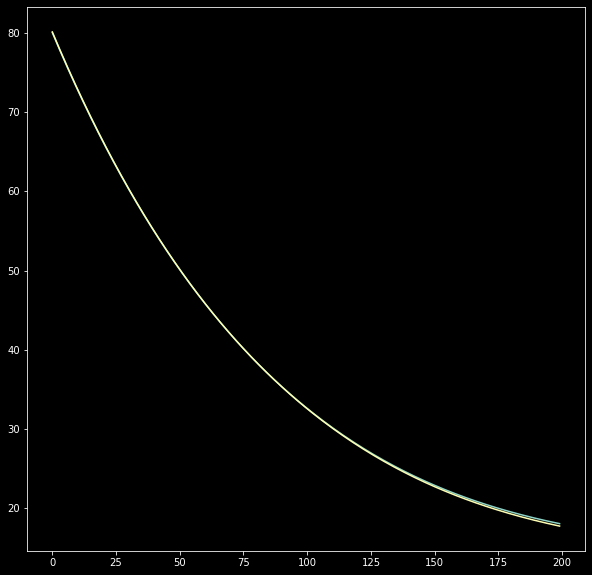

In [12]:
plt.figure(figsize=(10, 10))
plt.plot(train_loss)
plt.plot(val_loss)
plt.show()

In [13]:
X_ = np.hstack((np.ones(X.shape), X))
Y_ = np.dot(X_, W)

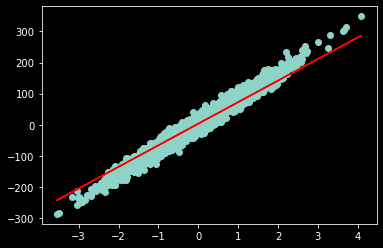

In [14]:
# lets see the predicted regression line

plt.scatter(X, Y)
plt.plot(X_[:,1], Y_, color='red')
plt.show()

In [15]:
print(X_)
print(Y_)
print(W)

[[ 1.         -0.28930742]
 [ 1.         -0.58880963]
 [ 1.          1.02750749]
 ...
 [ 1.         -0.30516366]
 [ 1.          1.67583291]
 [ 1.         -0.49175724]]
[[-16.93609722]
 [-37.71024638]
 [ 74.4011549 ]
 ...
 [-18.03592175]
 [119.37046847]
 [-30.97847342]]
[[ 3.13091777]
 [69.36225555]]
